# Práctica semanal

En esta práctica, trabajaremos dos proyectos distintos, uno de clasificación binaria y otro de clasificación multiclase. 

## Clasificación binaria

Nuestro dataset se encuentra en el archivo ``data/transfusion.csv``. Cada línea contiene información de donantes de sangre y tiene las siguientes columnas:

- ``meses_ultima``: número de meses desde la última donación de sangre
- ``frecuencia``: número de veces que la persona ha donado sangre
- ``volumen``: cantidad total de sangre (en ml) donada por la persona
- ``meses_primera``: número de meses desde la primera donación de sangre
- ``donante``: si la persona ha donado sangre durante el último mes

Nuestro propósito es construir la función ``es_donante(meses_ultima, frecuencia, volumen, meses_primera)`` la cual devuelve ``True`` si se predice que la persona donaría sangre el próximo mes, ``False`` si no.

In [1]:
# Cargamos bibliotecas importantes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

# Cargamos el dataset de transfusion
transfusion_data = pd.read_csv('data/transfusion.csv')
transfusion_data.head()

,meses_ultima,frecuencia,volumen,meses_primera,donante
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [ ]:
# EJERCICIO (1pt): Colocar los datos en formato numpy

transfusion_x = None # Independientes: contiene las columnas meses_ultima, frecuencia, volumen y meses_primera
transfusion_y = None # Dependiente: contiene la columna donante

In [ ]:
# EJERCICIO (2pt): Entrenar un modelo de regresión logística con scikit-learn
transfusion_modelo = None

In [ ]:
# EJERCICIO (2pt): Crear una función de predicción
def es_donante(meses_ultima, frecuencia, volumen, meses_primera):
    
    # Devuelve True si se predice como donante, False si no
    return None

In [ ]:
# --- CELDA PARA PROBAR SU MODELO UNA VEZ ESTÉ ENTRENADO --- #

## Precisión del modelo debe ser aproximadamente 0.77
print('Precisión: ', (transfusion_modelo.predict(transfusion_x) == transfusion_y).mean())

# Debe dar False
print('es_donante(3, 20, 1000, 8): ', es_donante(3, 20, 1000, 8))

# Debe dar True
print('es_donante(6, 12, 5000, 20): ', es_donante(6, 12, 5000, 20))

## Clasificación multiclase

Nuestro dataset se encuentra en el archivo ``data/provincias.csv``, el cual contiene 484 observaciones de puntos de latitud (columna ``lat``) y longitud (columna ``long``) en el territorio nacional, con una variable ``provincia`` que indica en qué provincia se ubica cada punto. 

Nuestro propósito es construir una función ``cual_provincia(latitud, longitud)`` la cual devuelve el nombre de la provincia y su probabilidad correspondiente. 

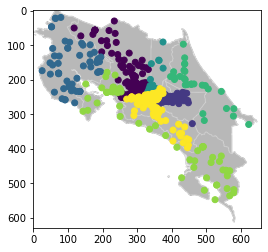

In [2]:
# Cargamos el dataset de provincias
provincias_data = pd.read_csv('data/provincias_scaled.csv')

# Y mostramos los puntos en el mapa
# Primero, codifiquemos las provincias en 0-6
le = preprocessing.LabelEncoder()
le.fit(provincias_data['provincia'])
c = le.transform(provincias_data['provincia'])

# Leemos el archivo
im = plt.imread('data/mapaCR.png')
implot = plt.imshow(im)

# Escalamos los arrays en 0-1
p_long = provincias_data['long']
p_lat = provincias_data['lat']

# Dibujamos (con un pequeño offset empírico para que caiga en la imágen)
plt.scatter((im.shape[0]*p_long)*0.95 + 25, (im.shape[1]*(1-p_lat))*0.8 + 20, c=c)

In [ ]:
# EJERCICIO (2pt): Entrenar un modelo de regresión softmax para distinguir la probabilidad de que un punto 
# esté en cada provincia
# *** NOTA IMPORTANTE: para los datos de entrenamiento, vamos a utilizar los arrays escalados "p_long" y "p_lat"

provincias_model = None

In [ ]:
# EJERCICIO (2pt): Función que devuelve un diccionario con la probabilidad de que un punto (longitud, latitud) 
# se encuentre en una provincia dada, 
# p.ej. {'ALAJUELA': 0.3, 'CARTAGO': 0.1, 'PUNTARENAS': 0.1, 
#        'LIMON': 0.1 'GUANACASTE': 0.1, 'HEREDIA': 0.2, 'SAN JOSE': 0.1}

def prob_provincias(long, lat):
    return None

In [ ]:
# EJERCICIO (1pt): Función que devuelve la provincia de mayor probabilidad a la que un punto (longitud, latitud)
# pertenece.

def cual_provincia(long, lat):
    return None

In [ ]:
# --- CELDA PARA PROBAR SU MODELO UNA VEZ ESTÉ ENTRENADO --- #

from scipy.spatial import Delaunay
points = np.array((p_long, p_lat)).T
hull = Delaunay(points)

samples = np.random.rand(20000,2)
samples = np.array([x for x in samples if hull.find_simplex(x) >= 0]).T

im = plt.imread('data/mapaCR.png')
implot = plt.imshow(im)

plt.scatter((samples[0]*im.shape[0])*0.95 + 25, ((1.0-samples[1])*im.shape[1])*0.8 + 20, c=le.transform(provincias_model.predict(samples.T)), alpha=0.05)